In [ ]:
""" setup """

import numpy as np

import matplotlib.pyplot as plt
plt.style.use(['classic'])

from redbaron import redbaron
redbaron.ipython_behavior = False

from pyha.simulation.simulation_interface import assert_sim_match

from scipy import signal

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


<IPython.core.display.Javascript object>


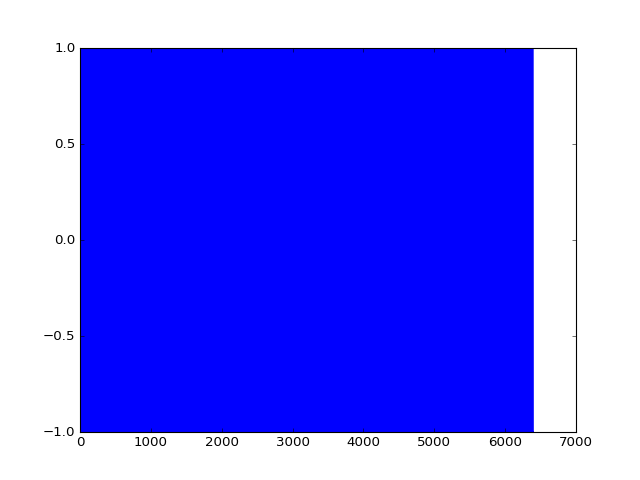

<IPython.core.display.Javascript object>


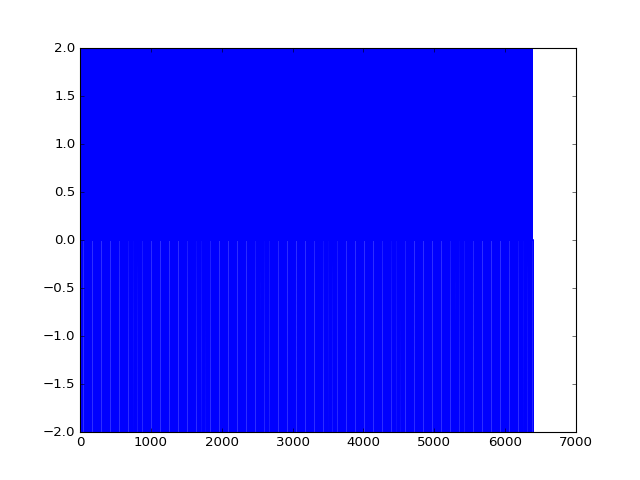

<IPython.core.display.Javascript object>


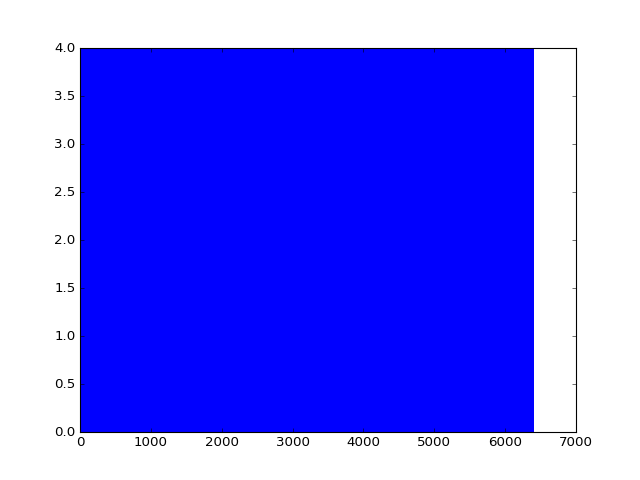

In [19]:
data = [1, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 0, 1, 1, 1, 0] * 100
nrz = [1 if x == 1 else -1 for x in data]
sps = 4
nrz_data = np.array([[x] * sps for x in nrz]).flatten()
plt.plot(nrz_data)
plt.show()

dff = np.diff(nrz_data)
plt.plot(dff)
plt.show()

dff_sq = dff ** 2
plt.plot(dff_sq)
plt.show()

<IPython.core.display.Javascript object>


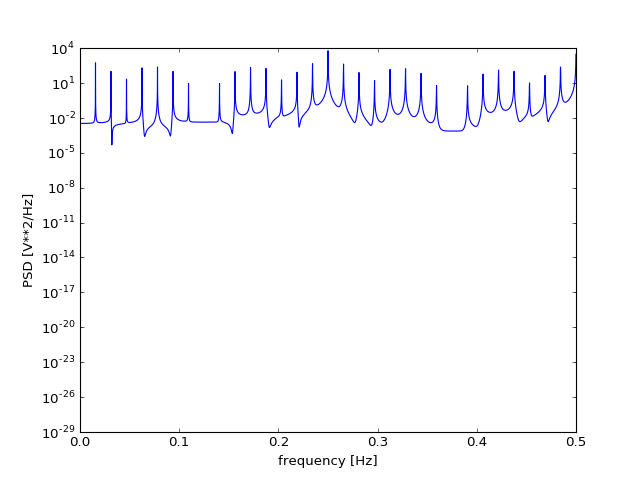

In [22]:
f, Pxx_den = signal.periodogram(dff_sq, 1)
plt.semilogy(f, Pxx_den)
# plt.ylim([1e-7, 1e2])
plt.xlabel('frequency [Hz]')
plt.ylabel('PSD [V**2/Hz]')
plt.show()

In [23]:
# static const int	NTAPS  =   8;
# static const int	NSTEPS = 128;

taps = [
  #    -4            -3            -2            -1             0             1             2             3                mu
  [  0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00 ], #   0/128
  [ -1.54700e-04,  8.53777e-04, -2.76968e-03,  7.89295e-03,  9.98534e-01, -5.41054e-03,  1.24642e-03, -1.98993e-04 ], #   1/128
  [ -3.09412e-04,  1.70888e-03, -5.55134e-03,  1.58840e-02,  9.96891e-01, -1.07209e-02,  2.47942e-03, -3.96391e-04 ], #   2/128
  [ -4.64053e-04,  2.56486e-03, -8.34364e-03,  2.39714e-02,  9.95074e-01, -1.59305e-02,  3.69852e-03, -5.92100e-04 ], #   3/128
  [ -6.18544e-04,  3.42130e-03, -1.11453e-02,  3.21531e-02,  9.93082e-01, -2.10389e-02,  4.90322e-03, -7.86031e-04 ], #   4/128
  [ -7.72802e-04,  4.27773e-03, -1.39548e-02,  4.04274e-02,  9.90917e-01, -2.60456e-02,  6.09305e-03, -9.78093e-04 ], #   5/128
  [ -9.26747e-04,  5.13372e-03, -1.67710e-02,  4.87921e-02,  9.88580e-01, -3.09503e-02,  7.26755e-03, -1.16820e-03 ], #   6/128
  [ -1.08030e-03,  5.98883e-03, -1.95925e-02,  5.72454e-02,  9.86071e-01, -3.57525e-02,  8.42626e-03, -1.35627e-03 ], #   7/128
  [ -1.23337e-03,  6.84261e-03, -2.24178e-02,  6.57852e-02,  9.83392e-01, -4.04519e-02,  9.56876e-03, -1.54221e-03 ], #   8/128
  [ -1.38589e-03,  7.69462e-03, -2.52457e-02,  7.44095e-02,  9.80543e-01, -4.50483e-02,  1.06946e-02, -1.72594e-03 ], #   9/128
  [ -1.53777e-03,  8.54441e-03, -2.80746e-02,  8.31162e-02,  9.77526e-01, -4.95412e-02,  1.18034e-02, -1.90738e-03 ], #  10/128
  [ -1.68894e-03,  9.39154e-03, -3.09033e-02,  9.19033e-02,  9.74342e-01, -5.39305e-02,  1.28947e-02, -2.08645e-03 ], #  11/128
  [ -1.83931e-03,  1.02356e-02, -3.37303e-02,  1.00769e-01,  9.70992e-01, -5.82159e-02,  1.39681e-02, -2.26307e-03 ], #  12/128
  [ -1.98880e-03,  1.10760e-02, -3.65541e-02,  1.09710e-01,  9.67477e-01, -6.23972e-02,  1.50233e-02, -2.43718e-03 ], #  13/128
  [ -2.13733e-03,  1.19125e-02, -3.93735e-02,  1.18725e-01,  9.63798e-01, -6.64743e-02,  1.60599e-02, -2.60868e-03 ], #  14/128
  [ -2.28483e-03,  1.27445e-02, -4.21869e-02,  1.27812e-01,  9.59958e-01, -7.04471e-02,  1.70776e-02, -2.77751e-03 ], #  15/128
  [ -2.43121e-03,  1.35716e-02, -4.49929e-02,  1.36968e-01,  9.55956e-01, -7.43154e-02,  1.80759e-02, -2.94361e-03 ], #  16/128
  [ -2.57640e-03,  1.43934e-02, -4.77900e-02,  1.46192e-01,  9.51795e-01, -7.80792e-02,  1.90545e-02, -3.10689e-03 ], #  17/128
  [ -2.72032e-03,  1.52095e-02, -5.05770e-02,  1.55480e-01,  9.47477e-01, -8.17385e-02,  2.00132e-02, -3.26730e-03 ], #  18/128
  [ -2.86289e-03,  1.60193e-02, -5.33522e-02,  1.64831e-01,  9.43001e-01, -8.52933e-02,  2.09516e-02, -3.42477e-03 ], #  19/128
  [ -3.00403e-03,  1.68225e-02, -5.61142e-02,  1.74242e-01,  9.38371e-01, -8.87435e-02,  2.18695e-02, -3.57923e-03 ], #  20/128
  [ -3.14367e-03,  1.76185e-02, -5.88617e-02,  1.83711e-01,  9.33586e-01, -9.20893e-02,  2.27664e-02, -3.73062e-03 ], #  21/128
  [ -3.28174e-03,  1.84071e-02, -6.15931e-02,  1.93236e-01,  9.28650e-01, -9.53307e-02,  2.36423e-02, -3.87888e-03 ], #  22/128
  [ -3.41815e-03,  1.91877e-02, -6.43069e-02,  2.02814e-01,  9.23564e-01, -9.84679e-02,  2.44967e-02, -4.02397e-03 ], #  23/128
  [ -3.55283e-03,  1.99599e-02, -6.70018e-02,  2.12443e-01,  9.18329e-01, -1.01501e-01,  2.53295e-02, -4.16581e-03 ], #  24/128
  [ -3.68570e-03,  2.07233e-02, -6.96762e-02,  2.22120e-01,  9.12947e-01, -1.04430e-01,  2.61404e-02, -4.30435e-03 ], #  25/128
  [ -3.81671e-03,  2.14774e-02, -7.23286e-02,  2.31843e-01,  9.07420e-01, -1.07256e-01,  2.69293e-02, -4.43955e-03 ], #  26/128
  [ -3.94576e-03,  2.22218e-02, -7.49577e-02,  2.41609e-01,  9.01749e-01, -1.09978e-01,  2.76957e-02, -4.57135e-03 ], #  27/128
  [ -4.07279e-03,  2.29562e-02, -7.75620e-02,  2.51417e-01,  8.95936e-01, -1.12597e-01,  2.84397e-02, -4.69970e-03 ], #  28/128
  [ -4.19774e-03,  2.36801e-02, -8.01399e-02,  2.61263e-01,  8.89984e-01, -1.15113e-01,  2.91609e-02, -4.82456e-03 ], #  29/128
  [ -4.32052e-03,  2.43930e-02, -8.26900e-02,  2.71144e-01,  8.83893e-01, -1.17526e-01,  2.98593e-02, -4.94589e-03 ], #  30/128
  [ -4.44107e-03,  2.50946e-02, -8.52109e-02,  2.81060e-01,  8.77666e-01, -1.19837e-01,  3.05345e-02, -5.06363e-03 ], #  31/128
  [ -4.55932e-03,  2.57844e-02, -8.77011e-02,  2.91006e-01,  8.71305e-01, -1.22047e-01,  3.11866e-02, -5.17776e-03 ], #  32/128
  [ -4.67520e-03,  2.64621e-02, -9.01591e-02,  3.00980e-01,  8.64812e-01, -1.24154e-01,  3.18153e-02, -5.28823e-03 ], #  33/128
  [ -4.78866e-03,  2.71272e-02, -9.25834e-02,  3.10980e-01,  8.58189e-01, -1.26161e-01,  3.24205e-02, -5.39500e-03 ], #  34/128
  [ -4.89961e-03,  2.77794e-02, -9.49727e-02,  3.21004e-01,  8.51437e-01, -1.28068e-01,  3.30021e-02, -5.49804e-03 ], #  35/128
  [ -5.00800e-03,  2.84182e-02, -9.73254e-02,  3.31048e-01,  8.44559e-01, -1.29874e-01,  3.35600e-02, -5.59731e-03 ], #  36/128
  [ -5.11376e-03,  2.90433e-02, -9.96402e-02,  3.41109e-01,  8.37557e-01, -1.31581e-01,  3.40940e-02, -5.69280e-03 ], #  37/128
  [ -5.21683e-03,  2.96543e-02, -1.01915e-01,  3.51186e-01,  8.30432e-01, -1.33189e-01,  3.46042e-02, -5.78446e-03 ], #  38/128
  [ -5.31716e-03,  3.02507e-02, -1.04150e-01,  3.61276e-01,  8.23188e-01, -1.34699e-01,  3.50903e-02, -5.87227e-03 ], #  39/128
  [ -5.41467e-03,  3.08323e-02, -1.06342e-01,  3.71376e-01,  8.15826e-01, -1.36111e-01,  3.55525e-02, -5.95620e-03 ], #  40/128
  [ -5.50931e-03,  3.13987e-02, -1.08490e-01,  3.81484e-01,  8.08348e-01, -1.37426e-01,  3.59905e-02, -6.03624e-03 ], #  41/128
  [ -5.60103e-03,  3.19495e-02, -1.10593e-01,  3.91596e-01,  8.00757e-01, -1.38644e-01,  3.64044e-02, -6.11236e-03 ], #  42/128
  [ -5.68976e-03,  3.24843e-02, -1.12650e-01,  4.01710e-01,  7.93055e-01, -1.39767e-01,  3.67941e-02, -6.18454e-03 ], #  43/128
  [ -5.77544e-03,  3.30027e-02, -1.14659e-01,  4.11823e-01,  7.85244e-01, -1.40794e-01,  3.71596e-02, -6.25277e-03 ], #  44/128
  [ -5.85804e-03,  3.35046e-02, -1.16618e-01,  4.21934e-01,  7.77327e-01, -1.41727e-01,  3.75010e-02, -6.31703e-03 ], #  45/128
  [ -5.93749e-03,  3.39894e-02, -1.18526e-01,  4.32038e-01,  7.69305e-01, -1.42566e-01,  3.78182e-02, -6.37730e-03 ], #  46/128
  [ -6.01374e-03,  3.44568e-02, -1.20382e-01,  4.42134e-01,  7.61181e-01, -1.43313e-01,  3.81111e-02, -6.43358e-03 ], #  47/128
  [ -6.08674e-03,  3.49066e-02, -1.22185e-01,  4.52218e-01,  7.52958e-01, -1.43968e-01,  3.83800e-02, -6.48585e-03 ], #  48/128
  [ -6.15644e-03,  3.53384e-02, -1.23933e-01,  4.62289e-01,  7.44637e-01, -1.44531e-01,  3.86247e-02, -6.53412e-03 ], #  49/128
  [ -6.22280e-03,  3.57519e-02, -1.25624e-01,  4.72342e-01,  7.36222e-01, -1.45004e-01,  3.88454e-02, -6.57836e-03 ], #  50/128
  [ -6.28577e-03,  3.61468e-02, -1.27258e-01,  4.82377e-01,  7.27714e-01, -1.45387e-01,  3.90420e-02, -6.61859e-03 ], #  51/128
  [ -6.34530e-03,  3.65227e-02, -1.28832e-01,  4.92389e-01,  7.19116e-01, -1.45682e-01,  3.92147e-02, -6.65479e-03 ], #  52/128
  [ -6.40135e-03,  3.68795e-02, -1.30347e-01,  5.02377e-01,  7.10431e-01, -1.45889e-01,  3.93636e-02, -6.68698e-03 ], #  53/128
  [ -6.45388e-03,  3.72167e-02, -1.31800e-01,  5.12337e-01,  7.01661e-01, -1.46009e-01,  3.94886e-02, -6.71514e-03 ], #  54/128
  [ -6.50285e-03,  3.75341e-02, -1.33190e-01,  5.22267e-01,  6.92808e-01, -1.46043e-01,  3.95900e-02, -6.73929e-03 ], #  55/128
  [ -6.54823e-03,  3.78315e-02, -1.34515e-01,  5.32164e-01,  6.83875e-01, -1.45993e-01,  3.96678e-02, -6.75943e-03 ], #  56/128
  [ -6.58996e-03,  3.81085e-02, -1.35775e-01,  5.42025e-01,  6.74865e-01, -1.45859e-01,  3.97222e-02, -6.77557e-03 ], #  57/128
  [ -6.62802e-03,  3.83650e-02, -1.36969e-01,  5.51849e-01,  6.65779e-01, -1.45641e-01,  3.97532e-02, -6.78771e-03 ], #  58/128
  [ -6.66238e-03,  3.86006e-02, -1.38094e-01,  5.61631e-01,  6.56621e-01, -1.45343e-01,  3.97610e-02, -6.79588e-03 ], #  59/128
  [ -6.69300e-03,  3.88151e-02, -1.39150e-01,  5.71370e-01,  6.47394e-01, -1.44963e-01,  3.97458e-02, -6.80007e-03 ], #  60/128
  [ -6.71985e-03,  3.90083e-02, -1.40136e-01,  5.81063e-01,  6.38099e-01, -1.44503e-01,  3.97077e-02, -6.80032e-03 ], #  61/128
  [ -6.74291e-03,  3.91800e-02, -1.41050e-01,  5.90706e-01,  6.28739e-01, -1.43965e-01,  3.96469e-02, -6.79662e-03 ], #  62/128
  [ -6.76214e-03,  3.93299e-02, -1.41891e-01,  6.00298e-01,  6.19318e-01, -1.43350e-01,  3.95635e-02, -6.78902e-03 ], #  63/128
  [ -6.77751e-03,  3.94578e-02, -1.42658e-01,  6.09836e-01,  6.09836e-01, -1.42658e-01,  3.94578e-02, -6.77751e-03 ], #  64/128
  [ -6.78902e-03,  3.95635e-02, -1.43350e-01,  6.19318e-01,  6.00298e-01, -1.41891e-01,  3.93299e-02, -6.76214e-03 ], #  65/128
  [ -6.79662e-03,  3.96469e-02, -1.43965e-01,  6.28739e-01,  5.90706e-01, -1.41050e-01,  3.91800e-02, -6.74291e-03 ], #  66/128
  [ -6.80032e-03,  3.97077e-02, -1.44503e-01,  6.38099e-01,  5.81063e-01, -1.40136e-01,  3.90083e-02, -6.71985e-03 ], #  67/128
  [ -6.80007e-03,  3.97458e-02, -1.44963e-01,  6.47394e-01,  5.71370e-01, -1.39150e-01,  3.88151e-02, -6.69300e-03 ], #  68/128
  [ -6.79588e-03,  3.97610e-02, -1.45343e-01,  6.56621e-01,  5.61631e-01, -1.38094e-01,  3.86006e-02, -6.66238e-03 ], #  69/128
  [ -6.78771e-03,  3.97532e-02, -1.45641e-01,  6.65779e-01,  5.51849e-01, -1.36969e-01,  3.83650e-02, -6.62802e-03 ], #  70/128
  [ -6.77557e-03,  3.97222e-02, -1.45859e-01,  6.74865e-01,  5.42025e-01, -1.35775e-01,  3.81085e-02, -6.58996e-03 ], #  71/128
  [ -6.75943e-03,  3.96678e-02, -1.45993e-01,  6.83875e-01,  5.32164e-01, -1.34515e-01,  3.78315e-02, -6.54823e-03 ], #  72/128
  [ -6.73929e-03,  3.95900e-02, -1.46043e-01,  6.92808e-01,  5.22267e-01, -1.33190e-01,  3.75341e-02, -6.50285e-03 ], #  73/128
  [ -6.71514e-03,  3.94886e-02, -1.46009e-01,  7.01661e-01,  5.12337e-01, -1.31800e-01,  3.72167e-02, -6.45388e-03 ], #  74/128
  [ -6.68698e-03,  3.93636e-02, -1.45889e-01,  7.10431e-01,  5.02377e-01, -1.30347e-01,  3.68795e-02, -6.40135e-03 ], #  75/128
  [ -6.65479e-03,  3.92147e-02, -1.45682e-01,  7.19116e-01,  4.92389e-01, -1.28832e-01,  3.65227e-02, -6.34530e-03 ], #  76/128
  [ -6.61859e-03,  3.90420e-02, -1.45387e-01,  7.27714e-01,  4.82377e-01, -1.27258e-01,  3.61468e-02, -6.28577e-03 ], #  77/128
  [ -6.57836e-03,  3.88454e-02, -1.45004e-01,  7.36222e-01,  4.72342e-01, -1.25624e-01,  3.57519e-02, -6.22280e-03 ], #  78/128
  [ -6.53412e-03,  3.86247e-02, -1.44531e-01,  7.44637e-01,  4.62289e-01, -1.23933e-01,  3.53384e-02, -6.15644e-03 ], #  79/128
  [ -6.48585e-03,  3.83800e-02, -1.43968e-01,  7.52958e-01,  4.52218e-01, -1.22185e-01,  3.49066e-02, -6.08674e-03 ], #  80/128
  [ -6.43358e-03,  3.81111e-02, -1.43313e-01,  7.61181e-01,  4.42134e-01, -1.20382e-01,  3.44568e-02, -6.01374e-03 ], #  81/128
  [ -6.37730e-03,  3.78182e-02, -1.42566e-01,  7.69305e-01,  4.32038e-01, -1.18526e-01,  3.39894e-02, -5.93749e-03 ], #  82/128
  [ -6.31703e-03,  3.75010e-02, -1.41727e-01,  7.77327e-01,  4.21934e-01, -1.16618e-01,  3.35046e-02, -5.85804e-03 ], #  83/128
  [ -6.25277e-03,  3.71596e-02, -1.40794e-01,  7.85244e-01,  4.11823e-01, -1.14659e-01,  3.30027e-02, -5.77544e-03 ], #  84/128
  [ -6.18454e-03,  3.67941e-02, -1.39767e-01,  7.93055e-01,  4.01710e-01, -1.12650e-01,  3.24843e-02, -5.68976e-03 ], #  85/128
  [ -6.11236e-03,  3.64044e-02, -1.38644e-01,  8.00757e-01,  3.91596e-01, -1.10593e-01,  3.19495e-02, -5.60103e-03 ], #  86/128
  [ -6.03624e-03,  3.59905e-02, -1.37426e-01,  8.08348e-01,  3.81484e-01, -1.08490e-01,  3.13987e-02, -5.50931e-03 ], #  87/128
  [ -5.95620e-03,  3.55525e-02, -1.36111e-01,  8.15826e-01,  3.71376e-01, -1.06342e-01,  3.08323e-02, -5.41467e-03 ], #  88/128
  [ -5.87227e-03,  3.50903e-02, -1.34699e-01,  8.23188e-01,  3.61276e-01, -1.04150e-01,  3.02507e-02, -5.31716e-03 ], #  89/128
  [ -5.78446e-03,  3.46042e-02, -1.33189e-01,  8.30432e-01,  3.51186e-01, -1.01915e-01,  2.96543e-02, -5.21683e-03 ], #  90/128
  [ -5.69280e-03,  3.40940e-02, -1.31581e-01,  8.37557e-01,  3.41109e-01, -9.96402e-02,  2.90433e-02, -5.11376e-03 ], #  91/128
  [ -5.59731e-03,  3.35600e-02, -1.29874e-01,  8.44559e-01,  3.31048e-01, -9.73254e-02,  2.84182e-02, -5.00800e-03 ], #  92/128
  [ -5.49804e-03,  3.30021e-02, -1.28068e-01,  8.51437e-01,  3.21004e-01, -9.49727e-02,  2.77794e-02, -4.89961e-03 ], #  93/128
  [ -5.39500e-03,  3.24205e-02, -1.26161e-01,  8.58189e-01,  3.10980e-01, -9.25834e-02,  2.71272e-02, -4.78866e-03 ], #  94/128
  [ -5.28823e-03,  3.18153e-02, -1.24154e-01,  8.64812e-01,  3.00980e-01, -9.01591e-02,  2.64621e-02, -4.67520e-03 ], #  95/128
  [ -5.17776e-03,  3.11866e-02, -1.22047e-01,  8.71305e-01,  2.91006e-01, -8.77011e-02,  2.57844e-02, -4.55932e-03 ], #  96/128
  [ -5.06363e-03,  3.05345e-02, -1.19837e-01,  8.77666e-01,  2.81060e-01, -8.52109e-02,  2.50946e-02, -4.44107e-03 ], #  97/128
  [ -4.94589e-03,  2.98593e-02, -1.17526e-01,  8.83893e-01,  2.71144e-01, -8.26900e-02,  2.43930e-02, -4.32052e-03 ], #  98/128
  [ -4.82456e-03,  2.91609e-02, -1.15113e-01,  8.89984e-01,  2.61263e-01, -8.01399e-02,  2.36801e-02, -4.19774e-03 ], #  99/128
  [ -4.69970e-03,  2.84397e-02, -1.12597e-01,  8.95936e-01,  2.51417e-01, -7.75620e-02,  2.29562e-02, -4.07279e-03 ], # 100/128
  [ -4.57135e-03,  2.76957e-02, -1.09978e-01,  9.01749e-01,  2.41609e-01, -7.49577e-02,  2.22218e-02, -3.94576e-03 ], # 101/128
  [ -4.43955e-03,  2.69293e-02, -1.07256e-01,  9.07420e-01,  2.31843e-01, -7.23286e-02,  2.14774e-02, -3.81671e-03 ], # 102/128
  [ -4.30435e-03,  2.61404e-02, -1.04430e-01,  9.12947e-01,  2.22120e-01, -6.96762e-02,  2.07233e-02, -3.68570e-03 ], # 103/128
  [ -4.16581e-03,  2.53295e-02, -1.01501e-01,  9.18329e-01,  2.12443e-01, -6.70018e-02,  1.99599e-02, -3.55283e-03 ], # 104/128
  [ -4.02397e-03,  2.44967e-02, -9.84679e-02,  9.23564e-01,  2.02814e-01, -6.43069e-02,  1.91877e-02, -3.41815e-03 ], # 105/128
  [ -3.87888e-03,  2.36423e-02, -9.53307e-02,  9.28650e-01,  1.93236e-01, -6.15931e-02,  1.84071e-02, -3.28174e-03 ], # 106/128
  [ -3.73062e-03,  2.27664e-02, -9.20893e-02,  9.33586e-01,  1.83711e-01, -5.88617e-02,  1.76185e-02, -3.14367e-03 ], # 107/128
  [ -3.57923e-03,  2.18695e-02, -8.87435e-02,  9.38371e-01,  1.74242e-01, -5.61142e-02,  1.68225e-02, -3.00403e-03 ], # 108/128
  [ -3.42477e-03,  2.09516e-02, -8.52933e-02,  9.43001e-01,  1.64831e-01, -5.33522e-02,  1.60193e-02, -2.86289e-03 ], # 109/128
  [ -3.26730e-03,  2.00132e-02, -8.17385e-02,  9.47477e-01,  1.55480e-01, -5.05770e-02,  1.52095e-02, -2.72032e-03 ], # 110/128
  [ -3.10689e-03,  1.90545e-02, -7.80792e-02,  9.51795e-01,  1.46192e-01, -4.77900e-02,  1.43934e-02, -2.57640e-03 ], # 111/128
  [ -2.94361e-03,  1.80759e-02, -7.43154e-02,  9.55956e-01,  1.36968e-01, -4.49929e-02,  1.35716e-02, -2.43121e-03 ], # 112/128
  [ -2.77751e-03,  1.70776e-02, -7.04471e-02,  9.59958e-01,  1.27812e-01, -4.21869e-02,  1.27445e-02, -2.28483e-03 ], # 113/128
  [ -2.60868e-03,  1.60599e-02, -6.64743e-02,  9.63798e-01,  1.18725e-01, -3.93735e-02,  1.19125e-02, -2.13733e-03 ], # 114/128
  [ -2.43718e-03,  1.50233e-02, -6.23972e-02,  9.67477e-01,  1.09710e-01, -3.65541e-02,  1.10760e-02, -1.98880e-03 ], # 115/128
  [ -2.26307e-03,  1.39681e-02, -5.82159e-02,  9.70992e-01,  1.00769e-01, -3.37303e-02,  1.02356e-02, -1.83931e-03 ], # 116/128
  [ -2.08645e-03,  1.28947e-02, -5.39305e-02,  9.74342e-01,  9.19033e-02, -3.09033e-02,  9.39154e-03, -1.68894e-03 ], # 117/128
  [ -1.90738e-03,  1.18034e-02, -4.95412e-02,  9.77526e-01,  8.31162e-02, -2.80746e-02,  8.54441e-03, -1.53777e-03 ], # 118/128
  [ -1.72594e-03,  1.06946e-02, -4.50483e-02,  9.80543e-01,  7.44095e-02, -2.52457e-02,  7.69462e-03, -1.38589e-03 ], # 119/128
  [ -1.54221e-03,  9.56876e-03, -4.04519e-02,  9.83392e-01,  6.57852e-02, -2.24178e-02,  6.84261e-03, -1.23337e-03 ], # 120/128
  [ -1.35627e-03,  8.42626e-03, -3.57525e-02,  9.86071e-01,  5.72454e-02, -1.95925e-02,  5.98883e-03, -1.08030e-03 ], # 121/128
  [ -1.16820e-03,  7.26755e-03, -3.09503e-02,  9.88580e-01,  4.87921e-02, -1.67710e-02,  5.13372e-03, -9.26747e-04 ], # 122/128
  [ -9.78093e-04,  6.09305e-03, -2.60456e-02,  9.90917e-01,  4.04274e-02, -1.39548e-02,  4.27773e-03, -7.72802e-04 ], # 123/128
  [ -7.86031e-04,  4.90322e-03, -2.10389e-02,  9.93082e-01,  3.21531e-02, -1.11453e-02,  3.42130e-03, -6.18544e-04 ], # 124/128
  [ -5.92100e-04,  3.69852e-03, -1.59305e-02,  9.95074e-01,  2.39714e-02, -8.34364e-03,  2.56486e-03, -4.64053e-04 ], # 125/128
  [ -3.96391e-04,  2.47942e-03, -1.07209e-02,  9.96891e-01,  1.58840e-02, -5.55134e-03,  1.70888e-03, -3.09412e-04 ], # 126/128
  [ -1.98993e-04,  1.24642e-03, -5.41054e-03,  9.98534e-01,  7.89295e-03, -2.76968e-03,  8.53777e-04, -1.54700e-04 ], # 127/128
  [  0.00000e+00,  0.00000e+00,  0.00000e+00,  1.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00,  0.00000e+00 ], # 128/128
]

In [53]:
print(taps[1])

[-0.0001547, 0.000853777, -0.00276968, 0.00789295, 0.998534, -0.00541054, 0.00124642, -0.000198993]


<IPython.core.display.Javascript object>


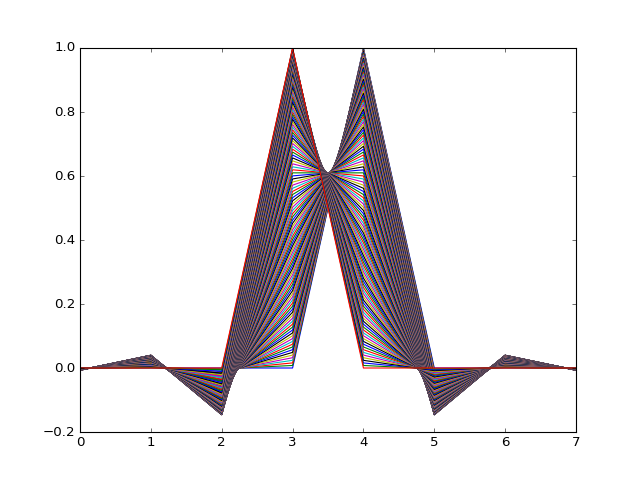

In [36]:
# w, h = signal.freqz(taps[1])
for x in taps:  
    plt.plot(x)

plt.show()

# test interpolator
basically consider filter delay (4 samples), it can shift total of 1 sample.

In [157]:
class InterpolateFilter:
    def __init__(self):
        self.internals = [0] * 8
        
    def filter(self, x, mu):
        filter_i = int(np.round(mu * 128))
        self.internals = [x]  + self.internals[:-1]
        ff = [coef * tap for coef, tap in zip(taps[filter_i], self.internals)]
        return sum(ff)

[-0.0019888   0.0130648  -0.0456413   0.1331993   0.9034083  -1.1630735
 -0.8259878   1.14959062  0.80627298 -1.07648242 -1.02967058 -0.84029718
  1.09953118  0.97871438  0.98263138  1.07301722  0.78446662]
[-0.0019888, 0.013064800000000001, -0.045641299999999996, 0.1331993, 0.9034083, -1.1630734999999999, -0.8259878, 1.14959062, 0.80627298, -1.07648242, -1.0296705800000001, -0.84029718, 1.09953118, 0.9787143800000001, 0.98263138, 1.07301722, 0.7844666199999999]


<IPython.core.display.Javascript object>


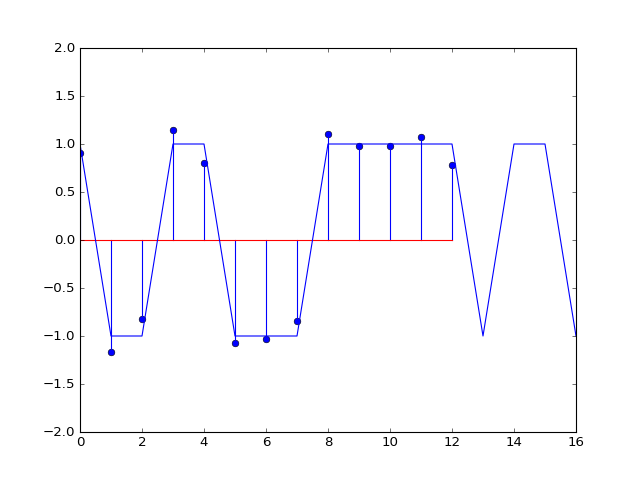

In [173]:
sig = [1, -1, -1, 1, 1, -1, -1, -1, 1, 1, 1, 1, 1, -1, 1, 1, -1]

# for x in taps:
#     intsig = signal.lfilter(x, [1.0], sig)
#     plt.stem(intsig)

intsig = signal.lfilter(taps[13], [1.0], sig)
print(intsig)
filtr = InterpolateFilter()
out = [filtr.filter(x, 0.1) for x in sig]
print(out)
plt.stem(intsig[4:])
plt.plot(sig)
plt.ylim([-2, 2])
plt.show()

In [179]:
def slice_to_nrz(x):
    return -1.0 if x < 0 else 1.0


def clip(x, limit):
    if x > limit:
        return limit
    elif x < -limit:
        return -limit
    return x

# def interpolate(x, mu):
#     filter_i = int(np.round(mu * 128))
#     print('filter_i', filter_i)
#     return signal.lfilter(taps[filter_i], [1.0], x)
        

def mm_clock(inp, omega, mu, gain_mu, gain_omega, omega_relative_limit):
    muhist = []
    mmhist = []
    
    d_mu = mu
    d_gain_mu = gain_mu
    d_gain_omega = gain_omega
    d_omega_relative_limit = omega_relative_limit
    d_last_sample = 0
    
    d_omega = omega;
    d_omega_mid = omega;
    d_omega_lim = d_omega_mid * omega_rel_lim;
    out = np.array([0.0] * 10000)
    oo = 0
    ni = len(inp) - 8
    ii = 0
    intfilt = InterpolateFilter()
    while ii < ni:
        muhist.append(d_mu)
        out[oo] = intfilt.filter(inp[ii], d_mu)
        mm_val = slice_to_nrz(d_last_sample) * out[oo] - slice_to_nrz(out[oo]) * d_last_sample
        mmhist.append(mm_val)
        d_last_sample = out[oo]

        d_omega += d_gain_omega * mm_val
        d_omega = d_omega_mid + clip(d_omega-d_omega_mid, d_omega_lim)
        d_mu = d_mu + d_omega + d_gain_mu * mm_val

        ii += int(np.floor(d_mu))
#         print(d_mu, ii)
        d_mu = d_mu - np.floor(d_mu)
        oo += 1
    return out, muhist, mmhist

<IPython.core.display.Javascript object>


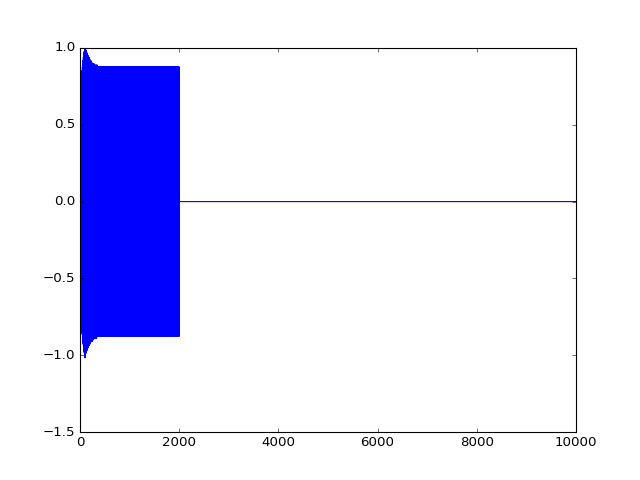

<IPython.core.display.Javascript object>


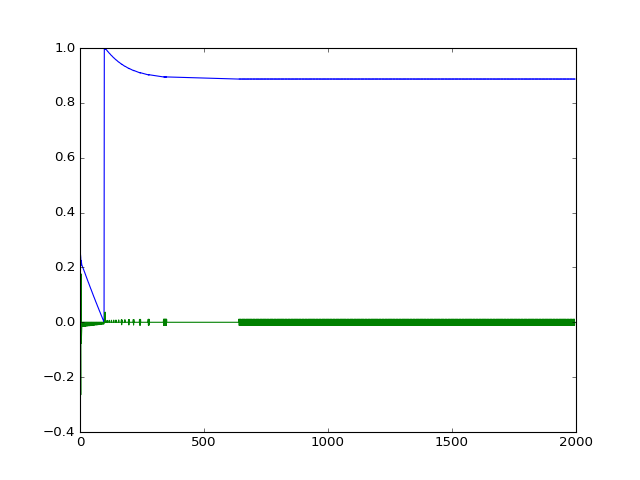

In [180]:
omega = 2
gain_omega = 0.01
mu = 0.25
gain_mu = 0.1
omega_rel_lim = 0.001
data = 1000*[1, 1, -1, -1]
expected_result = 1000*[-1.2, 1.2]

out, muhist, mmhist = mm_clock(data, omega, mu, gain_mu, gain_omega, omega_rel_lim)
plt.plot(out)
plt.show()

plt.plot(muhist)
plt.plot(mmhist)
plt.show()